In [1]:
from matplotlib import pyplot as plt
from scipy import stats as stats
import pandas as pd
import numpy as np

In [3]:
game_data=pd.read_pickle('../Merged DFs/Game_AllData.pkl')

In [21]:
game_data

,Away_Team,Home_Team,Away_Score,Home_Score,link,date,KEY,CloseOU,Close_Odds,year,...,Home_Pitcher,Away_Pitcher,OVER,Total_Runs,day_or_night,attendance,cli,Away_Pitch,Home_Pitch,other
0,SEA,OAK,9,7,/boxes/OAK/OAK201903200.shtml,2019-03-20,2019-03-20-OAK79,8.5,-120,2019,...,MFIERS,MGONZALES,True,16,N,"45,787",1.10,"(Marco Gonzales, /players/g/gonzama02.shtml)","(Mike Fiers, /players/f/fiersmi01.shtml)","Umpires: HP - Jeff Nelson, 1B - Tripp Gibson, ..."
1,SEA,OAK,5,4,/boxes/OAK/OAK201903210.shtml,2019-03-21,2019-03-21-OAK45,9.0,-130,2019,...,MESTRADA,YKIKUCHI,False,9,N,"46,451",1.01,"(Yusei Kikuchi, /players/k/kikucyu01.shtml)","(Marco Estrada, /players/e/estrama01.shtml)","Umpires: HP - Bill Welke, 1B - Lance Barksdale..."
2,PIT,CIN,3,5,/boxes/CIN/CIN201903280.shtml,2019-03-28,2019-03-28-CIN53,8.5,-105,2019,...,LCASTILLO,JTAILLON,False,8,D,"44,049",1.06,"(Jameson Taillon, /players/t/taillja01.shtml)","(Luis Castillo, /players/c/castilu02.shtml)","Umpires: HP - Joe West, 1B - Eric Cooper, 2B -..."
3,CHW,KCR,3,5,/boxes/KCA/KCA201903280.shtml,2019-03-28,2019-03-28-KCR53,8.5,-105,2019,...,BKELLER,CRODON,False,8,N,"31,675",1.08,"(Carlos Rodon, /players/r/rodonca01.shtml)","(Brad Keller, /players/k/kellebr01.shtml)","Umpires: HP - Jerry Meals, 1B - Ron Kulpa, 2B ..."
4,ARI,LAD,5,12,/boxes/LAN/LAN201903280.shtml,2019-03-28,2019-03-28-LAD125,7.0,-120,2019,...,HRYU,ZGREINKE,True,17,D,"53,086",1.08,"(Zack Greinke, /players/g/greinza01.shtml)","(Hyun Jin Ryu, /players/r/ryuhy01.shtml)","Umpires: HP - Brian Gorman, 1B - Scott Barry, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12111,CIN,PIT,0,4,/boxes/PIT/PIT201510040.shtml,2015-10-04,2015-10-04-PIT40,7.5,-105,2015,...,JHAPP,JSMITH,False,4,D,"35,362",.00,"(Josh A. Smith, /players/s/smithjo07.shtml)","(J.A. Happ, /players/h/happja01.shtml)","Umpires: HP - Tim Welke, 1B - Todd Tichenor, 2..."
12112,OAK,SEA,2,3,/boxes/SEA/SEA201510040.shtml,2015-10-04,2015-10-04-SEA32,7.5,-115,2015,...,VNUNO,CBASSITT,False,5,D,"22,402",.00,"(Chris Bassitt, /players/b/bassich01.shtml)","(Vidal Nuno III, /players/n/nunovi01.shtml)","Umpires: HP - Mike Estabrook, 1B - Ed Hickox, ..."
12113,COL,SFG,7,3,/boxes/SFN/SFN201510040.shtml,2015-10-04,2015-10-04-SFG37,7.5,-115,2015,...,MCAIN,CBERGMAN,True,10,D,"41,399",.00,"(Christian Bergman, /players/b/bergmch01.shtml)","(Matt Cain, /players/c/cainma01.shtml)","Umpires: HP - Carlos Torres, 1B - Andy Fletche..."
12114,TOR,TBR,3,12,/boxes/TBA/TBA201510040.shtml,2015-10-04,2015-10-04-TBR123,8.5,-120,2015,...,MMOORE,MBUEHRLE,True,15,D,"15,815",.00,"(Mark Buehrle, /players/b/buehrma01.shtml)","(Matt Moore, /players/m/moorema02.shtml)","Umpires: HP - Alfonso Marquez, 1B - Tom Hallio..."


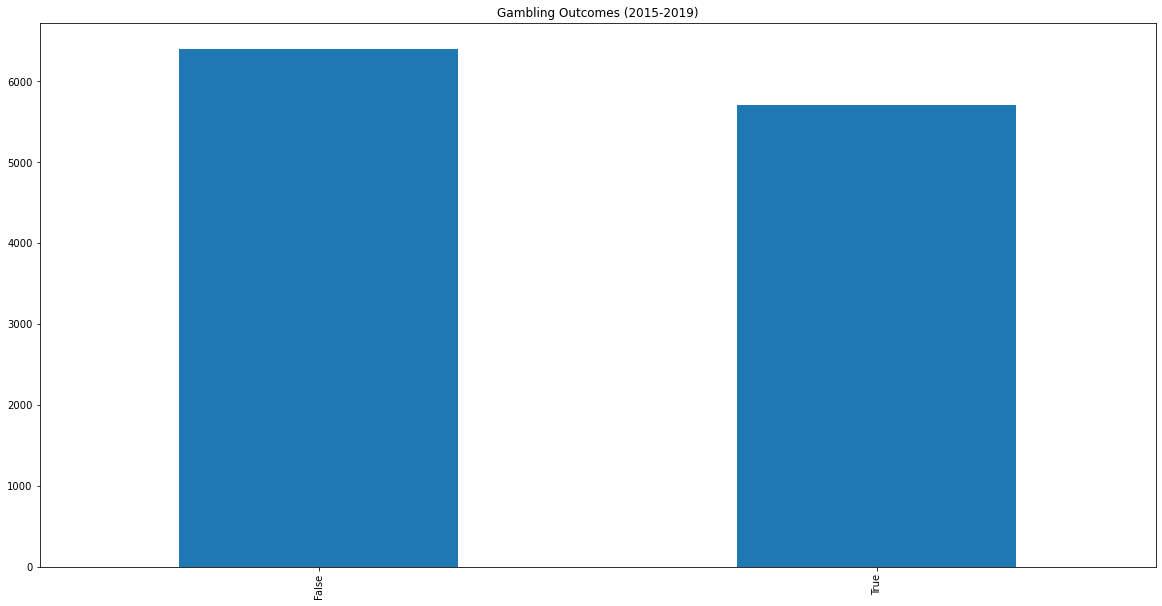

In [5]:
odds_split=game_data.OVER.value_counts()
odds_split
fig,ax=plt.subplots(figsize=(20,10))
ax.set_title('Gambling Outcomes (2015-2019)')
odds_split.plot.bar(ax=ax);

In [28]:
A=game_data.Away_Pitcher.value_counts()
H=game_data.Home_Pitcher.value_counts()
Pitchers=pd.concat([A,H],axis=1).fillna(0)
Pitchers['Total_Starts']=Pitchers.Away_Pitcher+Pitchers.Home_Pitcher
Pitchers=Pitchers.reset_index(level=1)

,level_1,Away_Pitch,Home_Pitch,Total_Starts
Jose Quintana,/players/q/quintjo01.shtml,82.0,76.0,158.0
Jake Arrieta,/players/a/arrieja01.shtml,82.0,67.0,149.0
Chris Sale,/players/s/salech01.shtml,79.0,68.0,147.0
Gerrit Cole,/players/c/colege01.shtml,78.0,73.0,151.0
Max Scherzer,/players/s/scherma01.shtml,78.0,80.0,158.0
...,...,...,...,...
Drew Gagnon,/players/g/gagnodr01.shtml,0.0,1.0,1.0
Rico Garcia,/players/g/garciri01.shtml,0.0,1.0,1.0
Jose Ruiz,/players/r/ruizjo01.shtml,0.0,1.0,1.0
Jaime Schultz,/players/s/schulja02.shtml,0.0,1.0,1.0


In [32]:
def get_experience(game):
    away_exp=Pitchers.loc[game.Away_Pitcher[0]].Total_Starts
    home_exp=Pitchers.loc[game.Home_Pitcher[0]].Total_Starts
    return away_exp+home_exp
game_data['pitcher_observations']=game_data.apply(get_experience,axis=1)

In [34]:
game_data.pitcher_observations.value_counts()

173.0    103
171.0     94
158.0     85
169.0     83
184.0     81
        ... 
9.0        2
11.0       2
12.0       2
8.0        1
312.0      1
Name: pitcher_observations, Length: 311, dtype: int64

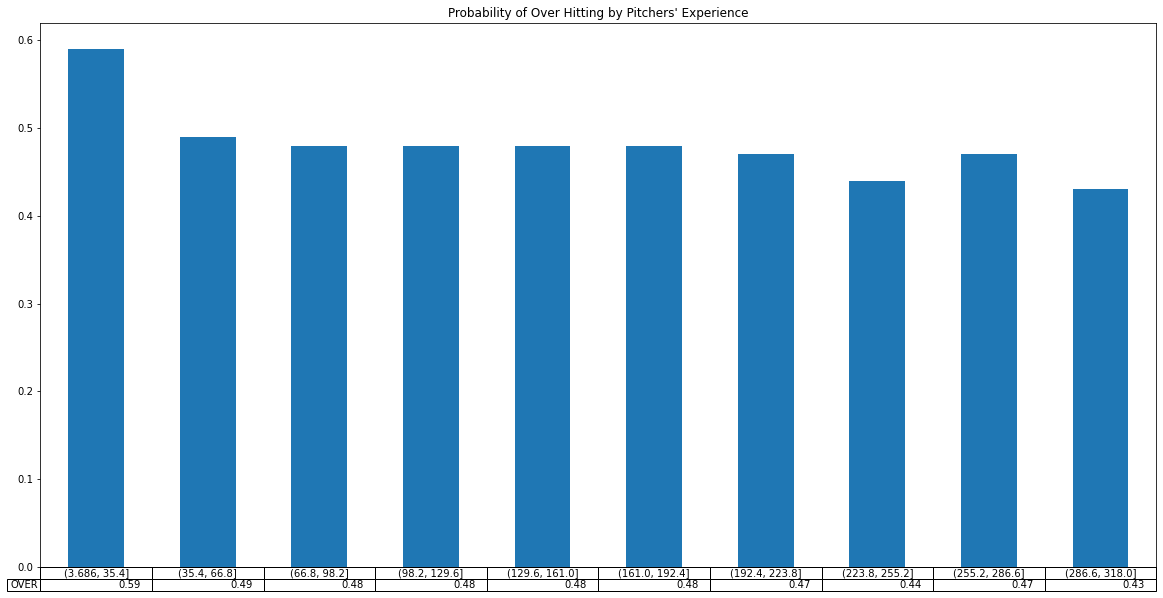

In [76]:
fig,ax=plt.subplots(figsize=(20,10))
ax.set_title('Probability of Over Hitting by Pitchers\' Experience')

buckets=pd.cut(game_data.pitcher_observations,10)
avgs=game_data.OVER.groupby(buckets).mean()
cell_text=[str(a) for a in avgs]
ax.xaxis.set_visible(False)

avgs.apply(lambda x:round(x,2)).plot.bar(ax=ax,table=True);

In [140]:
s='/players/g/gagnodr01.shtml'
game_data[game_data.Home_Pitch.apply(lambda t:t[1])==s]

,Away_Team,Home_Team,Away_Score,Home_Score,link,date,KEY,CloseOU,Close_Odds,year,...,Away_Pitcher,OVER,Total_Runs,day_or_night,attendance,cli,Away_Pitch,Home_Pitch,other,pitcher_observations
3789,PHI,NYM,7,3,/boxes/NYN/NYN201807100.shtml,2018-07-10,2018-07-10-NYM37,9.0,-125,2018,...,EDELOSSANTOS,True,10,N,"22,416",.05,"(Enyel De Los Santos, /players/d/delosen01.shtml)","(Drew Gagnon, /players/g/gagnodr01.shtml)","Umpires: HP - Phil Cuzzi, 1B - Dan Bellino, 2B...",4.0


In [143]:
def get_Pitcher_Overs(pitcher):
    s=pitcher.level_1
    away_OVER=game_data[game_data.Away_Pitcher.apply(lambda t:t[1])==s].OVER.sum()
    home_OVER=game_data[game_data.Home_Pitcher.apply(lambda t:t[1])==s].OVER.sum()
    return away_OVER+home_OVER
Pitchers['OVER_Count']=Pitchers.apply(get_Pitcher_Overs,axis=1)

In [149]:
Pitchers['Probs']=Pitchers.OVER_Count/Pitchers.Total_Starts
Pitchers[(Pitchers.Total_Starts > 50) & (Pitchers.Probs > 0.5)].sort

,level_1,Away_Pitch,Home_Pitch,Total_Starts,OVER_Count,Probs
Rick Porcello,/players/p/porceri01.shtml,77.0,82.0,159.0,84,0.528302
Chris Archer,/players/a/archech01.shtml,77.0,73.0,150.0,79,0.526667
Kyle Gibson,/players/g/gibsoky01.shtml,71.0,76.0,147.0,76,0.517007
Carlos Carrasco,/players/c/carraca01.shtml,66.0,63.0,129.0,67,0.519380
Stephen Strasburg,/players/s/strasst01.shtml,64.0,66.0,130.0,70,0.538462
Michael Wacha,/players/w/wachami01.shtml,62.0,61.0,123.0,67,0.544715
Anibal Sanchez,/players/s/sanchan01.shtml,61.0,61.0,122.0,62,0.508197
Jordan Zimmermann,/players/z/zimmejo02.shtml,60.0,66.0,126.0,71,0.563492
Mike Foltynewicz,/players/f/foltymi01.shtml,60.0,57.0,117.0,59,0.504274
James Paxton,/players/p/paxtoja01.shtml,56.0,58.0,114.0,60,0.526316


In [6]:
by_ATeam=game_data.groupby(['Away_Team']).OVER.agg(['sum','count','mean'])
by_HTeam=game_data.groupby(['Home_Team']).OVER.agg(['sum','count','mean'])
by_Team=by_ATeam+by_HTeam
by_Team['mean']=by_Team['sum']/by_Team['count']

In [16]:
by_line=game_data.groupby(['CloseOU']).OVER.agg(['sum','count','mean'])
by_line

,sum,count,mean
CloseOU,,,
5.0,0,1,0.000000
5.5,4,8,0.500000
6.0,29,69,0.420290
6.5,154,275,0.560000
7.0,443,999,0.443443
7.5,883,1661,0.531607
8.0,847,1795,0.471866
8.5,1118,2353,0.475138
9.0,955,2198,0.434486


In [8]:
annual_splits=game_data.groupby(['year']).OVER.agg(['sum','count','mean'])
monthly_splits=game_data.groupby(['month']).OVER.agg(['sum','count','mean'])

In [10]:
Hteams_years=game_data.pivot_table(['OVER'],index=['Home_Team'],columns=['year'],aggfunc='mean')
Ateams_years=game_data.pivot_table(['OVER'],index=['Away_Team'],columns=['year'],aggfunc='mean')
teams_years=(Ateams_years+Hteams_years)/2
teams_years.index.name='Team'
teams_years

OVER                                        
year      2015      2016      2017      2018      2019
Team                                                  
ARI   0.500000  0.534568  0.453781  0.456790  0.450617
ATL   0.487654  0.505626  0.493827  0.469136  0.469136
BAL   0.478870  0.403164  0.500000  0.456790  0.493827
BOS   0.506173  0.475309  0.444444  0.481481  0.565201
CHC   0.425926  0.450617  0.456790  0.432099  0.475309
CHW   0.471605  0.477855  0.450617  0.475309  0.450000
CIN   0.493750  0.537037  0.524691  0.487654  0.376543
CLE   0.478858  0.492655  0.388889  0.469136  0.438272
COL   0.512346  0.444444  0.382716  0.411021  0.481481
DET   0.528241  0.490585  0.530864  0.438272  0.422299
HOU   0.438272  0.456790  0.500000  0.438272  0.434568
KCR   0.459645  0.462963  0.462963  0.438272  0.502778
LAA   0.462963  0.425926  0.419753  0.432099  0.475309
LAD   0.477778  0.432099  0.475309  0.466501  0.475309
MIA   0.481481  0.490201  0.515670  0.491358  0.462963
MIL   0.487654  0.462963  0.414292  0.484568  0.425926
MIN   0.444444  0.580247  0.434645  0.493827  0.487654
NYM   0.527623  0.456556  0.558719  0.441204  0.465741
NYY   0.475309  0.434877  0.500000  0.481250  0.517503
OAK   0.543210  0.444444  0.518519  0.493827  0.438272
PHI   0.524691  0.471605  0.434954  0.450617  0.453472
PIT   0.456790  0.543210  0.388889  0.440818  0.567901
SDP   0.586420  0.496605  0.490664  0.481481  0.447377
SEA   0.487654  0.481481  0.447145  0.478472  0.515201
SFG   0.475309  0.459259  0.456790  0.432099  0.487654
STL   0.416590  0.512500  0.512346  0.462963  0.410031
TBR   0.470560  0.487654  0.475309  0.450617  0.484414
TEX   0.438272  0.500000  0.456790  0.466435  0.462963
TOR   0.481481  0.382716  0.456790  0.497454  0.462963
WSN   0.521991  0.471914  0.425926  0.472608  0.462963

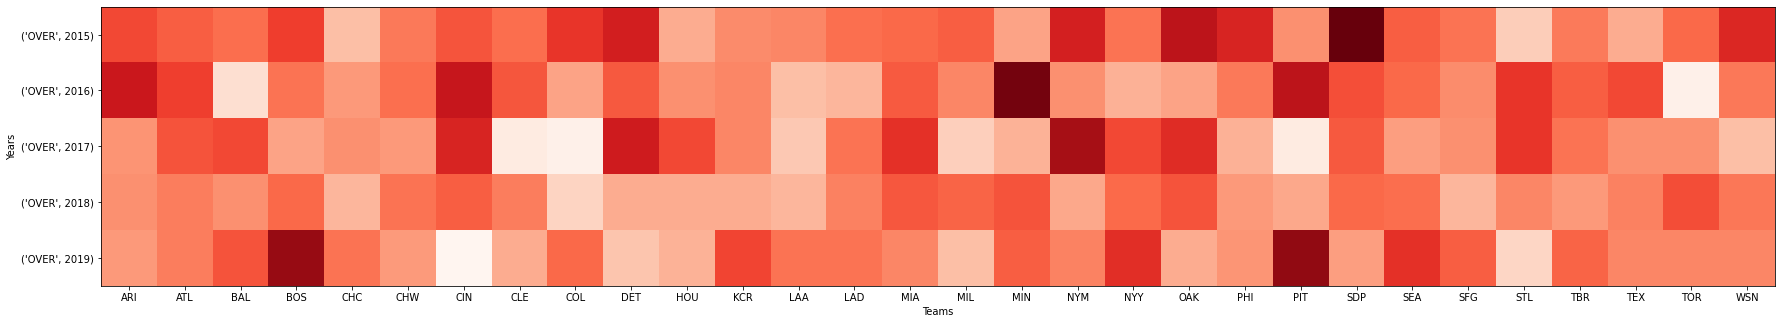

In [11]:
fig,ax=plt.subplots(figsize=(30,30))
indX=np.arange(teams_years.shape[0])
indY=np.arange(teams_years.shape[1])
im=ax.imshow(teams_years.transpose(),cmap='Reds')
ax.set_xlabel('Teams');
ax.set_ylabel('Years');
ax.set_xticks(indX);
ax.set_yticks(indY);
ax.set_yticklabels(teams_years.columns);
ax.set_xticklabels(teams_years.index);

In [12]:
odds_by_date=game_data.groupby(['date'])['OVER'].agg(['mean'])
D20=odds_by_date.resample('20D').mean()
D20.columns=['% Over']
D20['Overall Avg.']=game_data.OVER.mean()
D20

,% Over,Overall Avg.
date,,
2015-04-05,0.478358,0.471443
2015-04-25,0.514262,0.471443
2015-05-15,0.460002,0.471443
2015-06-04,0.462917,0.471443
2015-06-24,0.431565,0.471443
...,...,...
2019-06-23,0.443789,0.471443
2019-07-13,0.462102,0.471443
2019-08-02,0.476992,0.471443


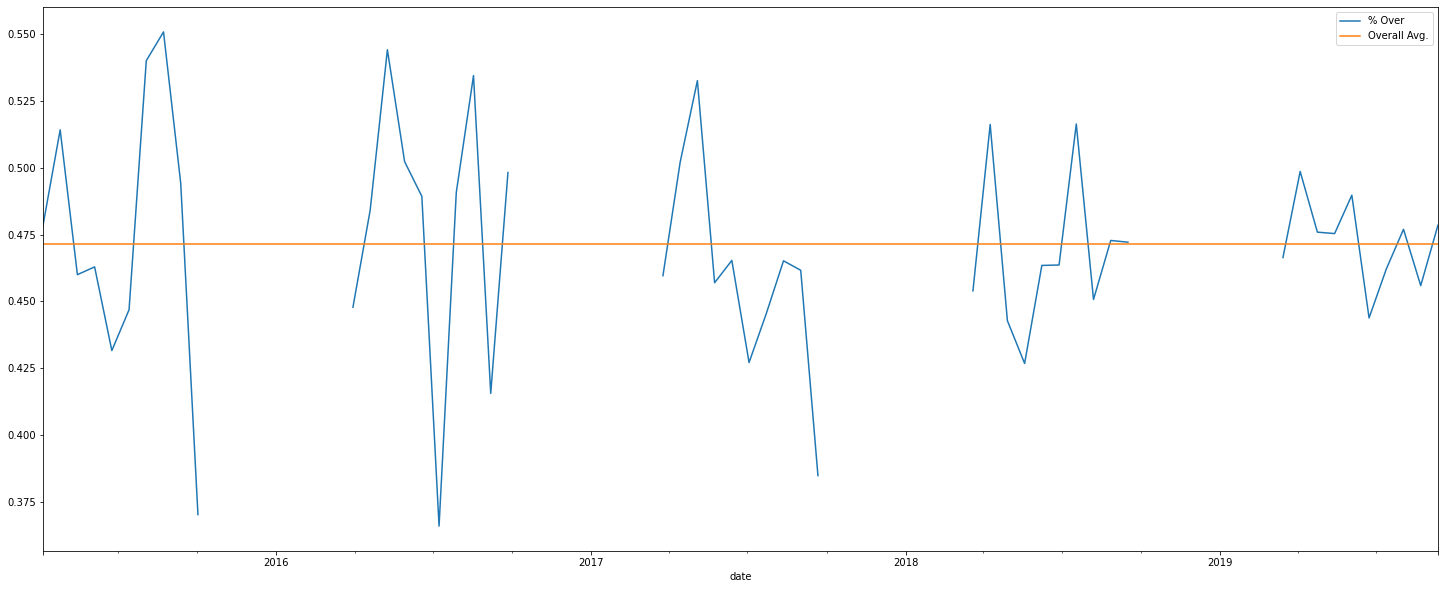

In [13]:
fig,ax=plt.subplots(figsize=(25,10))
D20.plot(ax=ax);

In [15]:
game_data.groupby('day_or_night').OVER.mean()

day_or_night
D    0.466749
N    0.473795
Name: OVER, dtype: float64

In [124]:
away_monthly_splits=game_data.groupby(['Away_Team','year','month'])['OVER'].mean()
home_monthly_splits=game_data.groupby(['Home_Team','year','month'])['OVER'].mean()
away_monthly_splits.index.names=['Team','year','month']
home_monthly_splits.index.names=['Team','year','month']
monthly_team_splits=(away_monthly_splits+home_monthly_splits)/2
monthly_pivot=monthly_team_splits.unstack().unstack().swaplevel('month','year',axis=1)
monthly_pivot=monthly_pivot.sort_index(axis=1,level=0).dropna(axis=1)

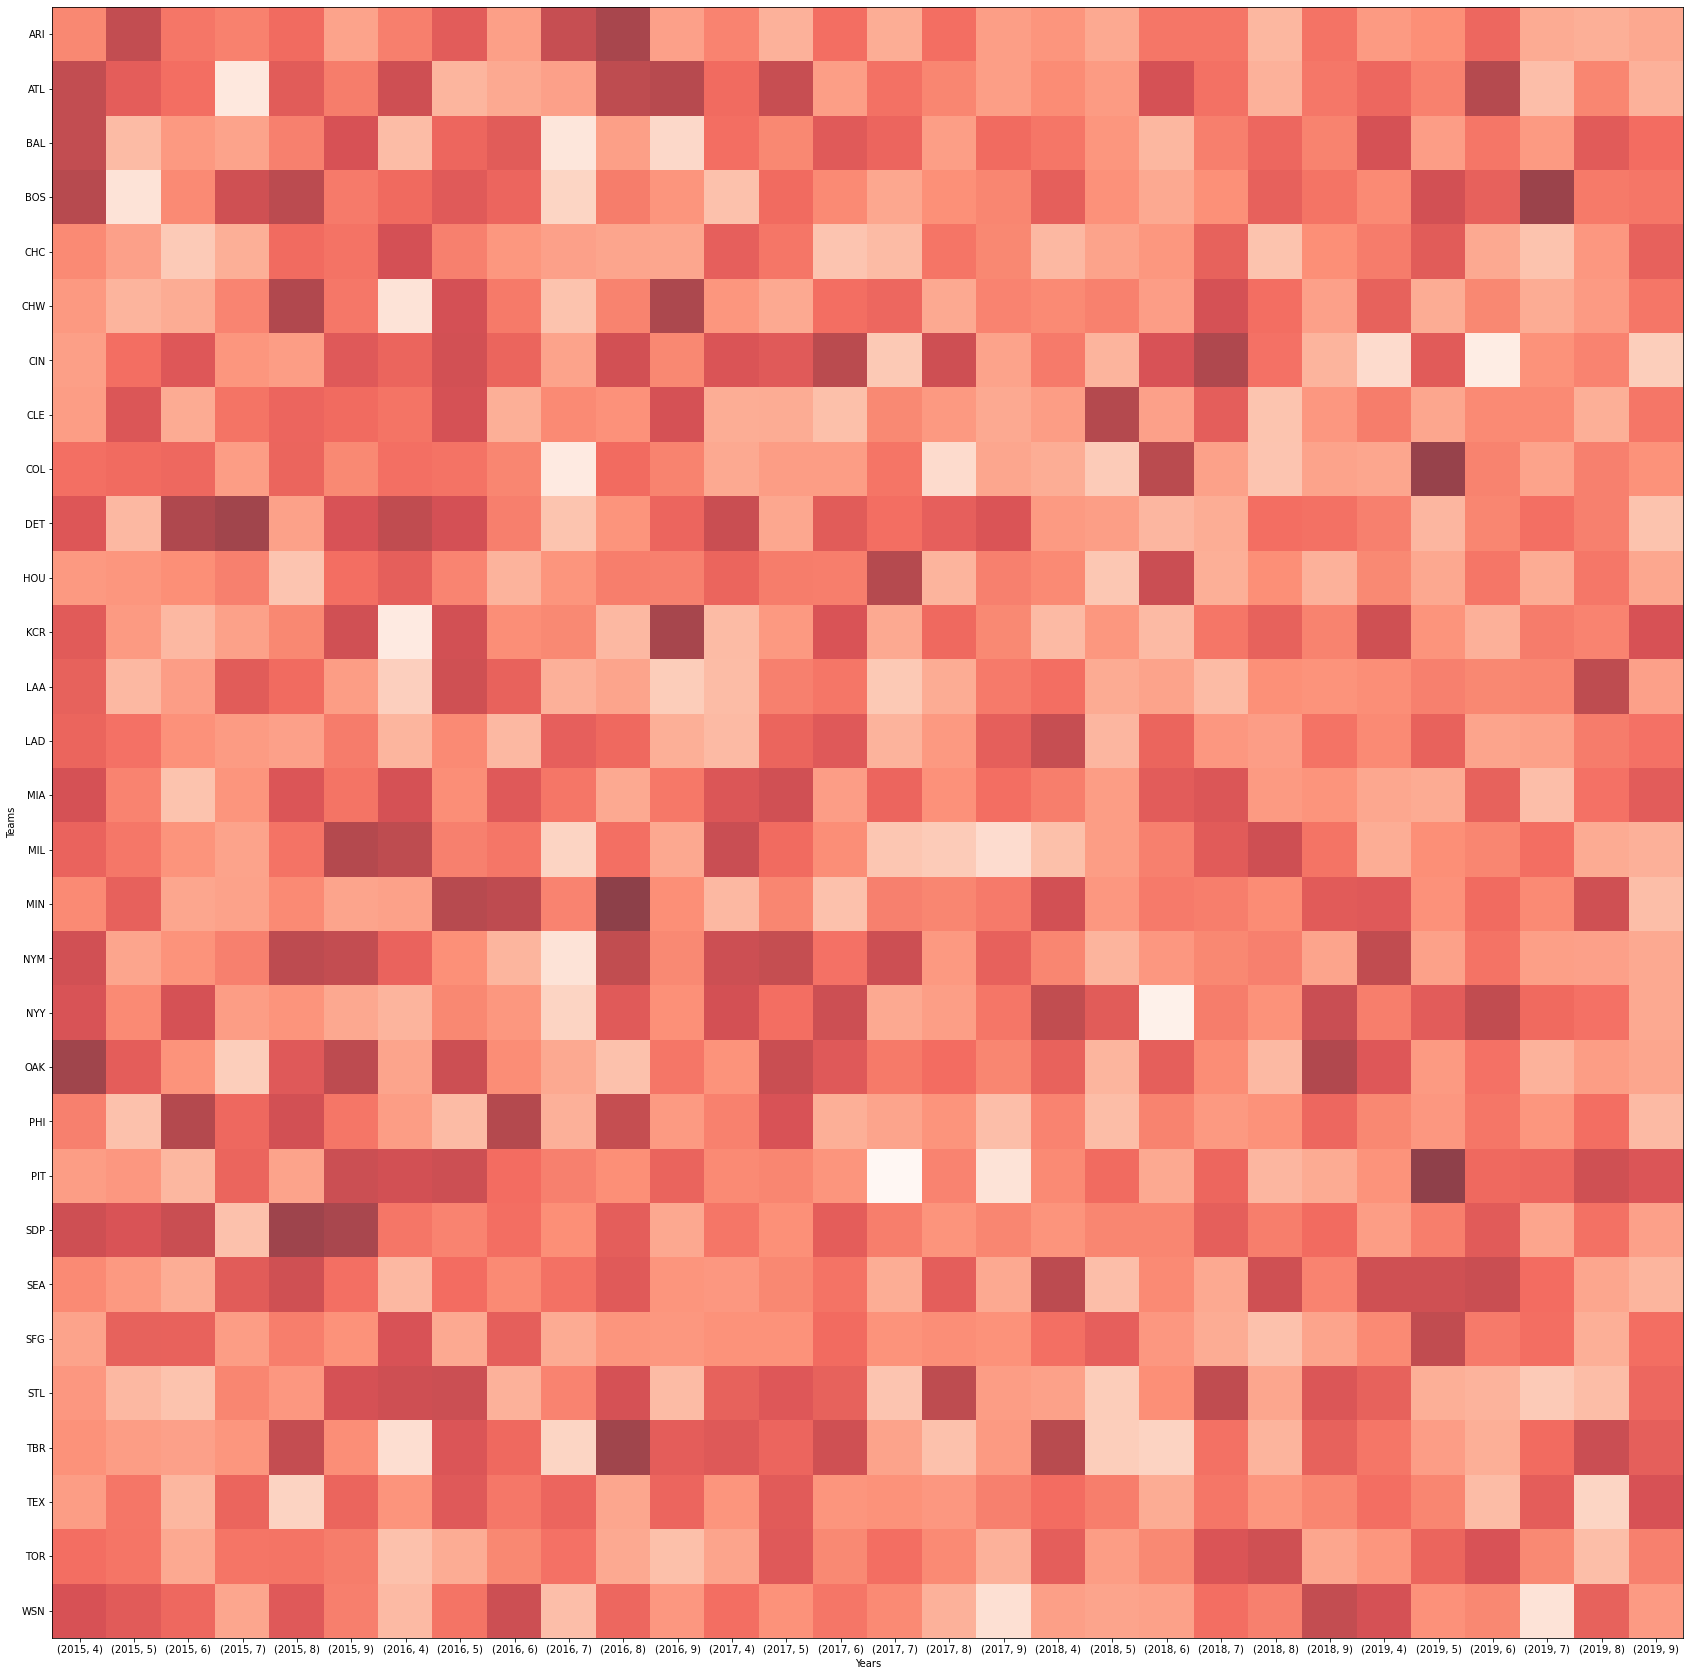

In [130]:
fig,ax=plt.subplots(figsize=(30,30))
indX=np.arange(monthly_pivot.shape[1])
indY=np.arange(monthly_pivot.shape[0])
im=ax.imshow(monthly_pivot,cmap='Reds',alpha=0.75)
ax.set_ylabel('Teams');
ax.set_xlabel('Years');
ax.set_xticks(indX);
ax.set_yticks(indY);
ax.set_xticklabels(monthly_pivot.columns);
ax.set_yticklabels(monthly_pivot.index);

In [127]:
ax.imshow?

Signature:
ax.imshow(
    X,
    cmap=None,
    norm=None,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    *,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the color mapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`image.interpolation`.

Parameters


In [123]:
X.sort_index(axis=1,level=0).dropna(axis=1)

year       2015                                                        2016  \
month         4         5         6         7         8         9         4   
Team                                                                          
ARI    0.464286  0.650000  0.500000  0.477778  0.524887  0.400568  0.481250   
ATL    0.650000  0.562500  0.519231  0.224242  0.566845  0.486264  0.619231   
BAL    0.650000  0.343137  0.425641  0.400000  0.480769  0.596591  0.340909   
BOS    0.675000  0.242647  0.458974  0.614583  0.667582  0.491667  0.528571   
CHC    0.459596  0.407692  0.305556  0.369318  0.525641  0.507692  0.602564   
CHW    0.425000  0.359729  0.378788  0.470238  0.683333  0.497549  0.243056   
CIN    0.409091  0.519231  0.577381  0.432692  0.416667  0.575000  0.541958   
CLE    0.416667  0.583333  0.380952  0.505952  0.540107  0.524725  0.504808   
COL    0.513889  0.525000  0.532828  0.416667  0.541026  0.460784  0.515152   
DET    0.580769  0.348558  0.685714  0.708333  0.403846  0.593750  0.655303   
HOU    0.425000  0.431818  0.447619  0.479021  0.320513  0.519231  0.557143   
KCR    0.568182  0.422619  0.348485  0.403743  0.464286  0.612821  0.215909   
LAA    0.550000  0.348558  0.414773  0.566434  0.526442  0.416667  0.291667   
LAD    0.541667  0.510417  0.444444  0.419231  0.406593  0.489583  0.355769   
MIA    0.600000  0.473558  0.323864  0.433333  0.585714  0.506061  0.599206   
MIL    0.547009  0.497596  0.437500  0.400000  0.506944  0.678363  0.657692   
MIN    0.458333  0.553977  0.392857  0.402597  0.459893  0.397436  0.405594   
NYM    0.609848  0.394444  0.439394  0.480769  0.664103  0.647727  0.545455   
NYY    0.591667  0.460526  0.598901  0.416667  0.437500  0.387701  0.358333   
OAK    0.711538  0.563348  0.439560  0.297203  0.574359  0.662088  0.397436   
PHI    0.481061  0.326923  0.678977  0.533333  0.607143  0.500000  0.416667   
PIT    0.416667  0.428571  0.351190  0.541667  0.400000  0.626794  0.607143   
SDP    0.619231  0.590476  0.633333  0.328571  0.712821  0.694444  0.500000   
SEA    0.458333  0.425641  0.375000  0.565934  0.614583  0.513736  0.348485   
SFG    0.400000  0.552036  0.547619  0.416667  0.485294  0.441667  0.594156   
STL    0.427273  0.348558  0.324242  0.467647  0.427083  0.600000  0.618881   
TBR    0.441667  0.415152  0.406250  0.431818  0.644886  0.450000  0.254167   
TEX    0.416667  0.500000  0.352273  0.541958  0.283422  0.541026  0.435714   
TOR    0.519231  0.502404  0.383523  0.503472  0.505682  0.486264  0.330128   
WSN    0.596154  0.568182  0.533333  0.392308  0.574519  0.483333  0.344697   

year                                 ...      2018                      \
month         5         6         7  ...         6         7         8   
Team                                 ...                                 
ARI    0.564103  0.408333  0.639860  ...  0.500000  0.500000  0.351190   
ATL    0.357143  0.385027  0.406250  ...  0.600000  0.511364  0.366667   
BAL    0.536932  0.566845  0.232026  ...  0.351190  0.483333  0.535897   
BOS    0.571429  0.538462  0.277778  ...  0.383333  0.445513  0.552198   
CHC    0.479167  0.430481  0.406061  ...  0.430481  0.550000  0.325000   
CHW    0.604167  0.493939  0.324675  ...  0.414216  0.600000  0.516667   
CIN    0.607143  0.541667  0.400000  ...  0.593939  0.685714  0.510417   
CLE    0.598558  0.369318  0.458333  ...  0.406061  0.560897  0.321429   
COL    0.508021  0.466667  0.215909  ...  0.670330  0.404762  0.320513   
DET    0.604167  0.483333  0.322917  ...  0.353846  0.374126  0.519231   
HOU    0.471154  0.360606  0.434028  ...  0.629121  0.371429  0.448485   
KCR    0.607143  0.450549  0.461538  ...  0.345238  0.500000  0.552083   
LAA    0.614583  0.549451  0.368750  ...  0.400000  0.343750  0.446023   
LAD    0.458974  0.348718  0.555556  ...  0.541667  0.428105  0.414773   
MIA    0.449519  0.575000  0.500000  ...  0.564103  0.583333  0.423077   
MIL    0.480769  0.500000  0.282051  ...  0.480769  0.569231

In [122]:
X.dropna(axis=1)

year,2015,2016,2017,2018,2019,2015,2016,2017,2018,2019,...,2015,2016,2017,2018,2019,2015,2016,2017,2018,2019
month,4,4,4,4,4,5,5,5,5,5,...,8,8,8,8,8,9,9,9,9,9
Team,,,,,,,,,,,,,,,,,,,,,
ARI,0.464286,0.481250,0.473529,0.433333,0.423077,0.650000,0.564103,0.364583,0.383523,0.447917,...,0.524887,0.697917,0.516667,0.351190,0.372159,0.400568,0.406250,0.412088,0.508333,0.387500
ATL,0.650000,0.619231,0.526786,0.455556,0.534722,0.562500,0.357143,0.635897,0.418269,0.478610,...,0.566845,0.657754,0.465241,0.366667,0.469231,0.486264,0.675325,0.411058,0.497436,0.365385
BAL,0.650000,0.340909,0.518939,0.500000,0.601648,0.343137,0.536932,0.464286,0.433155,0.414773,...,0.480769,0.409524,0.411058,0.535897,0.569519,0.596591,0.269231,0.524725,0.475275,0.521978
BOS,0.675000,0.528571,0.328571,0.557692,0.458333,0.242647,0.571429,0.525641,0.442857,0.608333,...,0.667582,0.486111,0.445055,0.552198,0.494048,0.491667,0.434211,0.466667,0.506061,0.500000
CHC,0.459596,0.602564,0.555556,0.348485,0.489510,0.407692,0.479167,0.500000,0.401099,0.566845,...,0.525641,0.395833,0.502451,0.325000,0.428571,0.507692,0.392857,0.464286,0.448718,0.552198
CHW,0.425000,0.243056,0.431818,0.458333,0.550000,0.359729,0.604167,0.384804,0.478022,0.378151,...,0.683333,0.475000,0.387019,0.516667,0.419643,0.497549,0.689744,0.473039,0.406593,0.500000
CIN,0.409091,0.541958,0.587413,0.491477,0.261364,0.519231,0.607143,0.571429,0.358974,0.569231,...,0.416667,0.607692,0.620192,0.510417,0.473558,0.575000,0.464286,0.400000,0.358333,0.296703
CLE,0.416667,0.504808,0.375000,0.416667,0.487013,0.583333,0.598558,0.376374,0.678571,0.393939,...,0.540107,0.444444,0.425641,0.321429,0.372596,0.524725,0.599432,0.383333,0.428571,0.500000
